Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Loading the dataset

In [ ]:
dataset = pd.read_csv("/content/diabetes.csv")

Exploratory data analysis

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

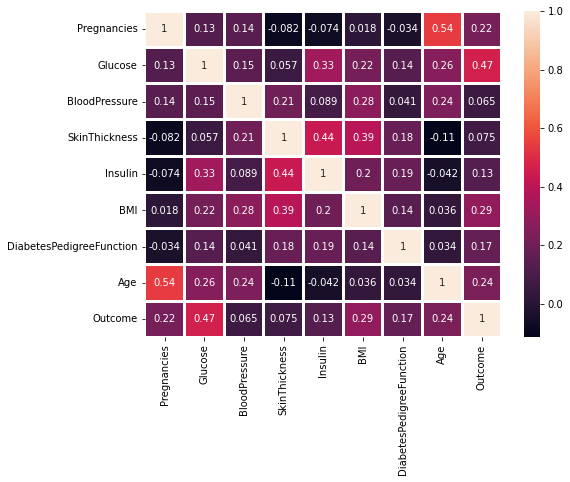

In [ ]:
#checking correlation between features
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, linewidths=2)
plt.show()

In [ ]:
#check for null values
dataset.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
# getting overview of columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#summary statistics
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#replace zero values with np.nan to visualize them
zero_not_accepted = ["Glucose", "BloodPressure", "SkinThickness",
                    "Insulin", "BMI"]
for col in zero_not_accepted:
    dataset[col].replace(0, np.nan, inplace=True)

#checkf if zeros were replaced in required columns
dataset.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


TypeError: ignored

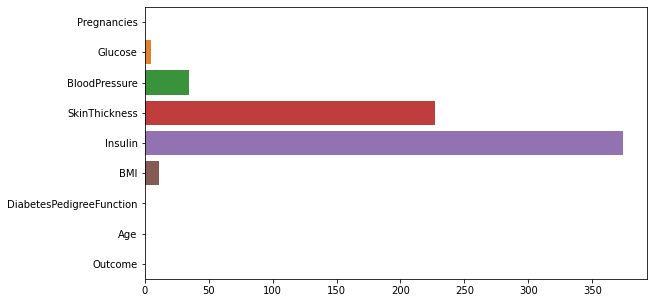

In [ ]:
#Visualizing Null values
plt.figure(figsize=(9,5))
ax = sns.barplot(x=dataset.isna().sum(),
           y=dataset.columns, orient='h')
for p in ax.patches:
    ax.annotate(text=f"{p.get_width():.0f}",
                xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points',
                ha="left", va="center",
               )
plt.grid(False)
plt.show()

In [ ]:
#imputing mean instead of null values
for col in zero_not_accepted:
    dataset[col].replace(np.nan, dataset[col].mean(), inplace=True)

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 1440x1440 with 0 Axes>

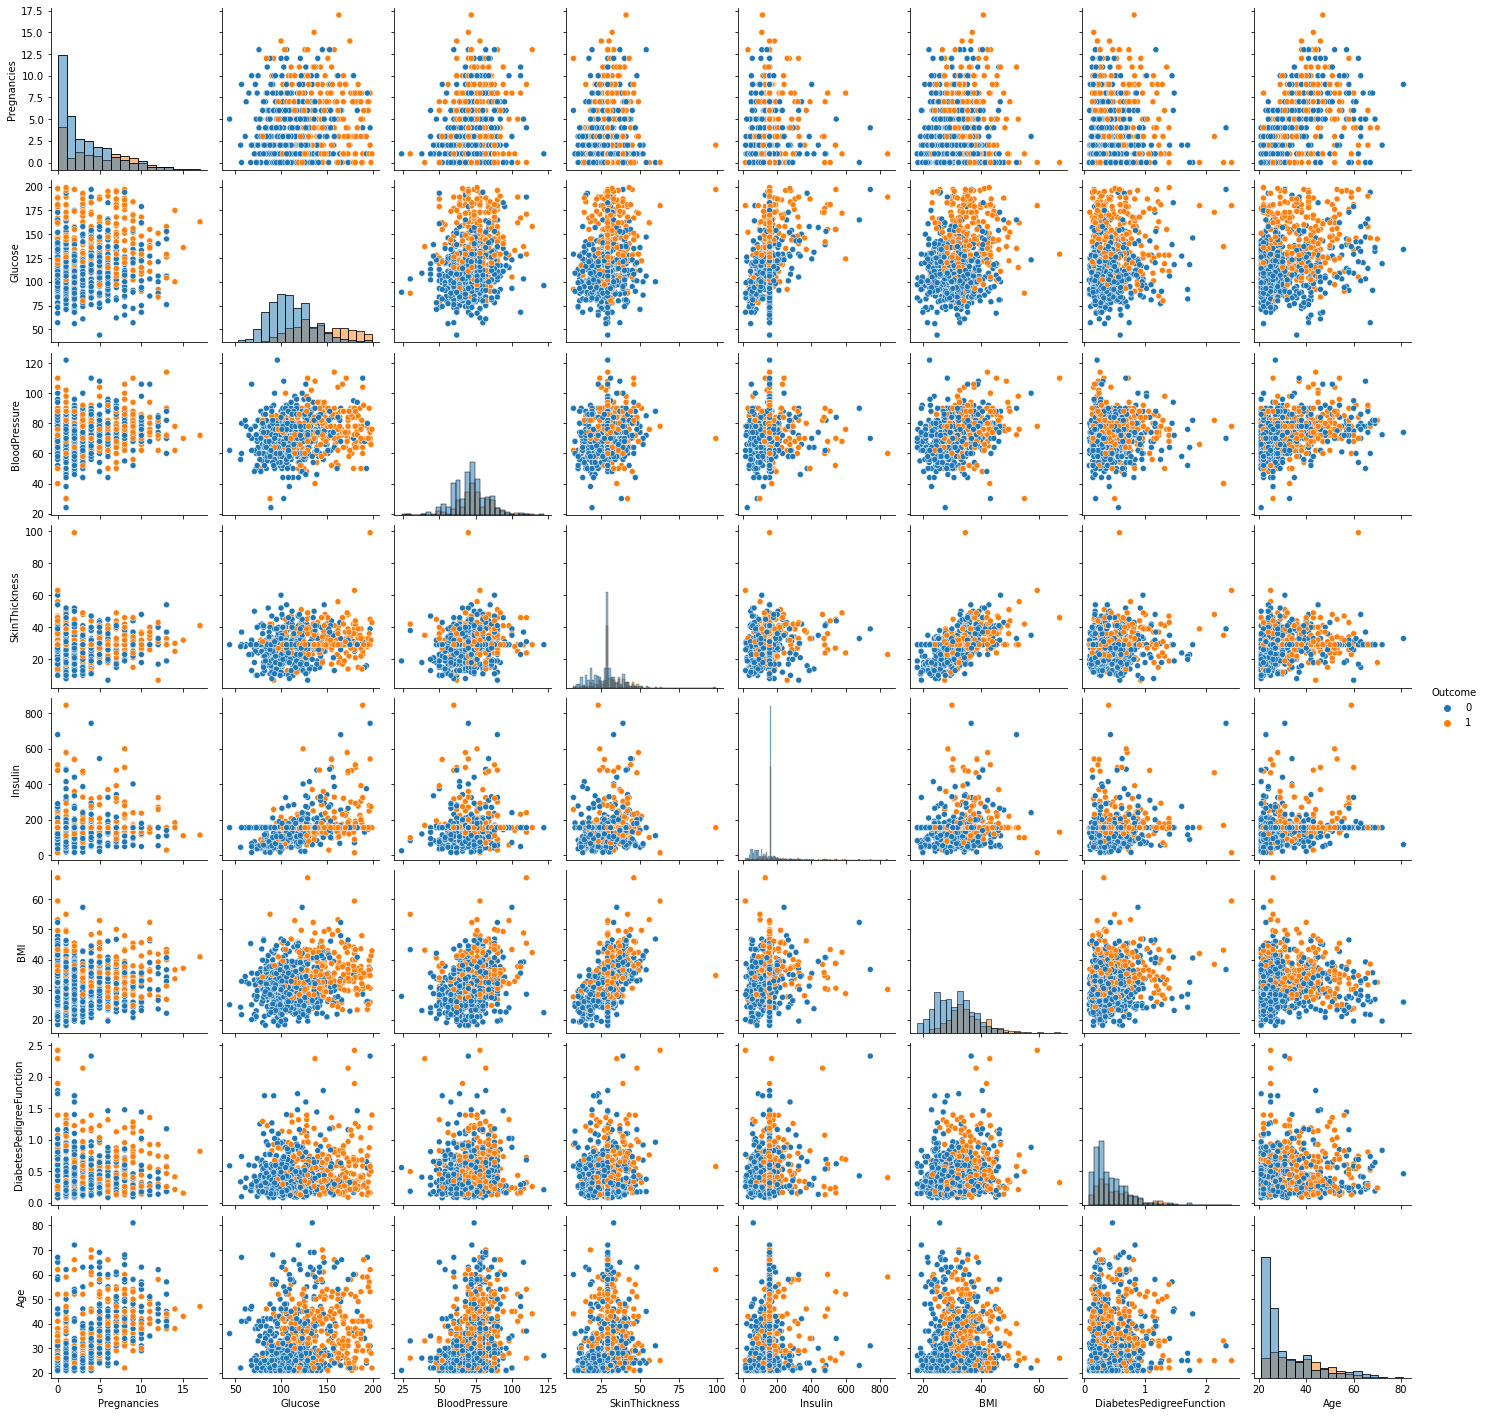

In [ ]:
#Plot pairwise relationships in a dataset
plt.figure(figsize=(20,20))
sns.pairplot(data=dataset, hue="Outcome", diag_kind="hist")
plt.show()

In [ ]:
#distribution of outcomes
dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
#extracting input and output features
X = dataset.iloc[:, :-1].to_numpy()
y = dataset.iloc[:, -1].to_numpy()

In [ ]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [ ]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=0)
X_r, y_r = smk.fit_resample(X, y)
# from imblearn.over_sampling import RandomOverSampler
# om = RandomOverSampler(random_state=0)
# X_r, y_r = om.fit_resample(X, y)

In [ ]:
#Check if over sampling worked
from collections import Counter
print(f"Initial counts: {Counter(y)}")
print(f"Resampled Counts: {Counter(y_r)}")

Initial counts: Counter({0: 500, 1: 268})
Resampled Counts: Counter({1: 479, 0: 479})


In [ ]:
print(X_r.shape, y_r.shape)

(958, 8) (958,)


In [ ]:
#updating the input and output features for further exploration
X = X_r
y = y_r

In [ ]:
#split the dataset in Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [ ]:
print(X_train.shape)
print(X_train)

(766, 8)
[[3.00e+00 6.10e+01 8.20e+01 ... 3.44e+01 2.43e-01 4.60e+01]
 [2.00e+00 6.80e+01 6.20e+01 ... 2.01e+01 2.57e-01 2.30e+01]
 [0.00e+00 1.09e+02 8.80e+01 ... 3.25e+01 8.55e-01 3.80e+01]
 ...
 [1.00e+01 1.62e+02 8.40e+01 ... 2.77e+01 1.82e-01 5.40e+01]
 [8.00e+00 1.43e+02 6.60e+01 ... 3.49e+01 1.29e-01 4.10e+01]
 [1.00e+00 1.08e+02 6.00e+01 ... 3.55e+01 4.15e-01 2.40e+01]]


In [ ]:
print(y_train.shape)
print(y_train)

(766,)
[0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1
 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0
 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0
 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1
 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0
 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 1 1

In [ ]:
print(X_test.shape)
print(X_test)

(192, 8)
[[5.81612968e+00 1.84551611e+02 7.92645187e+01 ... 4.04579007e+01
  8.51186951e-01 5.21838703e+01]
 [1.30000000e+01 7.60000000e+01 6.00000000e+01 ... 3.28000000e+01
  1.80000000e-01 4.10000000e+01]
 [0.00000000e+00 1.18000000e+02 8.40000000e+01 ... 4.58000000e+01
  5.51000000e-01 3.10000000e+01]
 ...
 [6.00000000e+00 1.37000000e+02 6.10000000e+01 ... 2.42000000e+01
  1.51000000e-01 5.50000000e+01]
 [3.00000000e+00 1.63000000e+02 7.00000000e+01 ... 3.16000000e+01
  2.68000000e-01 2.80000000e+01]
 [4.00000000e+00 1.17000000e+02 6.40000000e+01 ... 3.32000000e+01
  2.30000000e-01 2.40000000e+01]]


In [ ]:
print(y_test.shape)
print(y_test)

(192,)
[1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0
 0 0 0 0 0 1 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Notice the mean ~ 0 and std ~ 1 for all the input features
pd.DataFrame(X_train, columns=dataset.columns[:-1]).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02
mean,4.382917e-16,1.210520e-15,-2.627431e-15,6.136084e-15,-7.034698e-15,-4.355089e-15,-1.229072e-15,-3.617646e-16
std,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00
min,-1.213938e+00,-2.619745e+00,-4.045192e+00,-2.698515e+00,-1.704507e+00,-2.209780e+00,-1.265176e+00,-1.162507e+00
25%,-9.185987e-01,-7.537885e-01,-5.690561e-01,-2.870365e-01,-2.590102e-01,-6.961176e-01,-7.196745e-01,-8.129467e-01
50%,-3.279199e-01,-1.528873e-01,-3.893018e-02,-2.739033e-02,-8.063788e-02,-4.450486e-02,-2.592866e-01,-2.886055e-01
75%,7.488505e-01,6.777219e-01,5.896558e-01,3.158330e-01,-8.063788e-02,6.080437e-01,4.890344e-01,5.852965e-01
max,3.552266e+00,2.282344e+00,3.403670e+00,8.394285e+00,7.840362e+00,5.042408e+00,5.983419e+00,4.080904e+00


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:

#Helper functions to judge different classifiers

#function to display an exquisite confusion matrix
def disp_cm(y_test, y_pred)->float:
    """Displays the confusion matrix in the form of heatmap.

    Parameters:
    y_test (array-like): list of true labels
    y_pred (array-like): list of predicted labels

    Returns:
    acc_score (float): Accuracy score
    """
    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Accuracy: {acc_score:0.3f}")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    return acc_score
#function to generate performance report of a classifer
def judge_clf(classifier, X_train=X_train, y_train=y_train,
              X_test=X_test, y_test=y_test)->float:
    """Fits the `classifier` to `X_train`, `y_train` and generate an elegant
    classification report using `X_test` and `y_test`.

    Parameters:
    classifer : classifier obj implementing 'fit' method.
    X_train (array-like): 2D-array of input features of Training Set.
    y_train (array-like): list of target features of Training Set.
    X_test  (array-like): 2D-array of input features of Testing Set.
    y_test  (array-like): list of target features of Testing Set.

    Returns:
    acc_score (float): Accuracy score
    """
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_score = disp_cm(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return acc_score


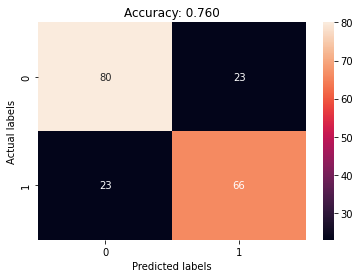

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       103
           1       0.74      0.74      0.74        89

    accuracy                           0.76       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.76      0.76      0.76       192



In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0)
log_acc = judge_clf(log_clf)

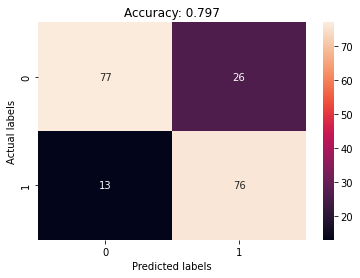

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       103
           1       0.75      0.85      0.80        89

    accuracy                           0.80       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.80      0.80      0.80       192



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_acc = judge_clf(knn_clf)

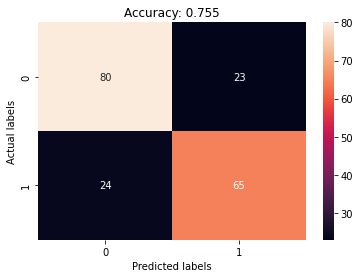

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       103
           1       0.74      0.73      0.73        89

    accuracy                           0.76       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.76      0.76      0.76       192



In [ ]:
from sklearn.svm import SVC
lsvm = SVC(kernel="linear", random_state=0)
lsvm_acc = judge_clf(lsvm)

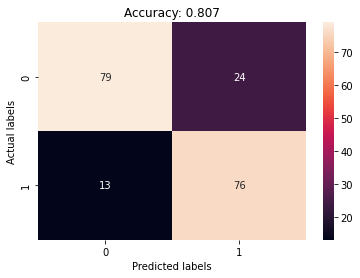

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       103
           1       0.76      0.85      0.80        89

    accuracy                           0.81       192
   macro avg       0.81      0.81      0.81       192
weighted avg       0.81      0.81      0.81       192



In [ ]:
ksvm = SVC(kernel="rbf", random_state=0)
ksvm_acc = judge_clf(ksvm)

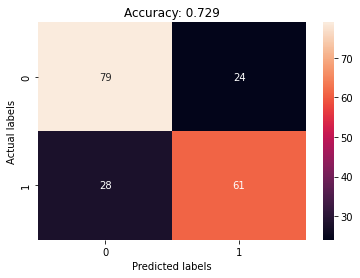

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       103
           1       0.72      0.69      0.70        89

    accuracy                           0.73       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.73      0.73      0.73       192



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
naiveb_acc = judge_clf(nb_clf)

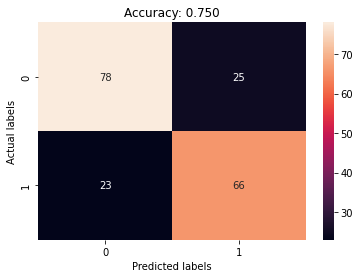

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       103
           1       0.73      0.74      0.73        89

    accuracy                           0.75       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.75      0.75      0.75       192



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier(criterion="entropy",
                                             random_state=0
                                  )
dtree_acc = judge_clf(dtree_clf)

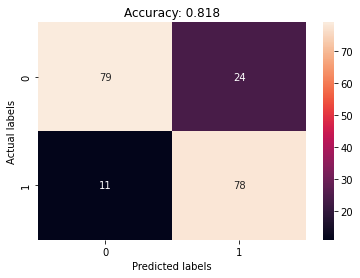

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       103
           1       0.76      0.88      0.82        89

    accuracy                           0.82       192
   macro avg       0.82      0.82      0.82       192
weighted avg       0.83      0.82      0.82       192



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfor_clf = RandomForestClassifier(n_estimators=100,
                                            criterion="entropy",
                                            random_state=0)
rfor_acc = judge_clf(rfor_clf)

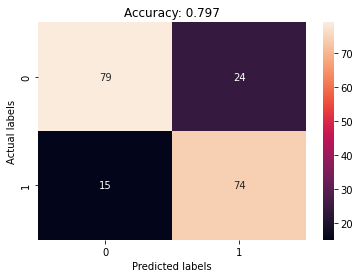

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       103
           1       0.76      0.83      0.79        89

    accuracy                           0.80       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.80      0.80      0.80       192



In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False,
                       verbosity=0)
xgb_acc = judge_clf(xgb_clf)

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
'''from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=0)
mlp_acc = judge_clf(mlp_clf)'''

'from sklearn.neural_network import MLPClassifier\nmlp_clf = MLPClassifier(random_state=0)\nmlp_acc = judge_clf(mlp_clf)'

In [ ]:
models = pd.DataFrame({
    'Model': ["Logistic Regr", "KNN", "SVM-Linear", "SVM-RBF",
             "Naive Bayes", "Decision-Tree", "Radom Forest", "XGB"],
    'Accuracy Score': [log_acc, knn_acc, lsvm_acc, ksvm_acc,
                       naiveb_acc, dtree_acc, rfor_acc, xgb_acc]
})

models.sort_values(by = 'Accuracy Score', ascending = False, ignore_index=True)

,Model,Accuracy Score
0,Radom Forest,0.817708
1,SVM-RBF,0.807292
2,KNN,0.796875
3,XGB,0.796875
4,Logistic Regr,0.760417
5,SVM-Linear,0.755208
6,Decision-Tree,0.750000
7,Naive Bayes,0.729167


In [ ]:
from sklearn.model_selection import cross_val_score
def perform_kfold(clf, X_train=X_train, y_train=y_train)->(float, float):
    """Performs k-fold cross validation on given data(X_train, y_train) using
    the `clf` (aka classifier)

    Parameters:
    classifer : classifier obj implementing 'fit' method.
    X_train (array-like): 2D-array of input features of Training Set.
    y_train (array-like): list of target features of Training Set.

    Returns:
    mean_score (float): Mean of Accuracy scores after operation.
    std_score  (float): Standard Deviation of Accuracy scores.
    """
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train,
                            cv=10 #number of folds
                            )

    mean_score = scores.mean()
    std_score = scores.std()
    print(f"Mean Accuracy: {mean_score*100:0.3f} %")
    print(f"Standard Deviation: {std_score*100:0.3f} %")

    return mean_score, std_score


In [ ]:
log_macc, log_std = perform_kfold(log_clf)

Mean Accuracy: 76.900 %
Standard Deviation: 4.854 %


In [ ]:
knn_macc, knn_std = perform_kfold(knn_clf)

Mean Accuracy: 79.250 %
Standard Deviation: 3.629 %


In [ ]:
lsvm_macc, lsvm_std = perform_kfold(lsvm)

Mean Accuracy: 77.027 %
Standard Deviation: 5.121 %


In [ ]:
ksvm_macc, ksvm_std = perform_kfold(ksvm)

Mean Accuracy: 80.422 %
Standard Deviation: 3.760 %


In [ ]:
naiveb_macc, naiveb_std = perform_kfold(nb_clf)

Mean Accuracy: 74.817 %
Standard Deviation: 6.047 %


In [ ]:
rfor_macc, rfor_std = perform_kfold(rfor_clf)

Mean Accuracy: 83.168 %
Standard Deviation: 2.892 %


In [ ]:
xgb_macc, xgb_std = perform_kfold(xgb_clf)

Mean Accuracy: 82.252 %
Standard Deviation: 3.232 %


In [ ]:
#mlp_macc, mlp_std = perform_kfold(mlp_clf)

In [ ]:
dtree_macc, dtree_std = perform_kfold(dtree_clf)

Mean Accuracy: 76.639 %
Standard Deviation: 4.688 %


In [ ]:
models_1 = pd.DataFrame({
    "Model": ["Logistic Regr", "KNN", "SVM-Linear", "SVM-RBF",
             "Naive Bayes", "Decision-Tree", "Radom Forest", "XGB"],
    "Mean Accuracy Score": [log_macc, knn_macc, lsvm_macc, ksvm_macc,
                       naiveb_macc, dtree_macc, rfor_macc, xgb_macc],
    "Stadard Dev": [log_std, knn_std, lsvm_std, ksvm_std,
                       naiveb_std, dtree_std, rfor_std, xgb_std
            ]
})

models_1.sort_values(by = 'Mean Accuracy Score', ascending = False,
                     ignore_index=True)

,Model,Mean Accuracy Score,Stadard Dev
0,Radom Forest,0.831681,0.028925
1,XGB,0.822522,0.032323
2,SVM-RBF,0.804221,0.037601
3,KNN,0.792498,0.036288
4,SVM-Linear,0.770267,0.051206
5,Logistic Regr,0.769002,0.048539
6,Decision-Tree,0.766388,0.046876
7,Naive Bayes,0.748172,0.060470


<Figure size 864x576 with 0 Axes>

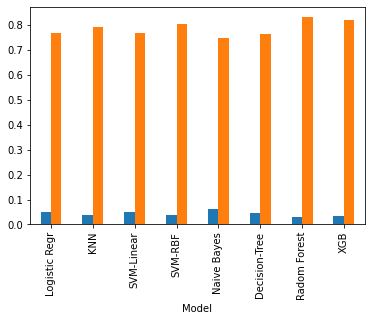

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(12, 8))
models_1.plot(x="Model", y=["Stadard Dev","Mean Accuracy Score"], kind="bar",legend=False)
plt.show()